In [14]:
from IPython.display import display
import numpy as np
import pandas as pd
import scipy as scp 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
import math

### Task 1: SVM - Theory and Practice

##### a - Draw the points and plot them such that the two different classes can be distinguished

In [15]:
x1 = [1, 1]
x2 = [-1, -1]
x3 = [-1, 1]
x4 = [1, -1]

xn = np.array((x1, x2, x3, x4))
xn

x = xn[:, 0]
y = xn[:, 1]
t = [1, 1, -1, -1]

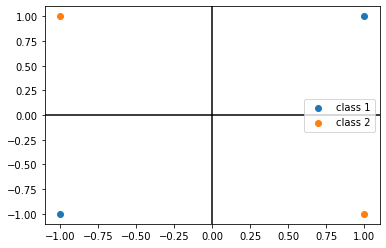

In [16]:
fix, ax = plt.subplots()
ax.scatter(x[:2], y[:2])
ax.scatter(x[2:], y[2:])
#ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.legend(('class 1', 'class 2'), loc='center right')

##### b - Since the points are not linearly separable in 2D, they will be transferred to higher dimension in an attempt to make them linearly separable in a higher dimension. Use the following basis function to transfer each of the four 2D points to 6D $\phi: R^2 \rightarrow R^6$
$$
\phi(x) = \phi(x_1, x_2) = (1, \sqrt2x_1, \sqrt2x_2, \sqrt2x_1x_2, x_1^2, x_2^2)^T
$$
i.e. calculate $z_n = \phi(x_n), n = 1, ..., 4 = N$

In [17]:
def transform(point):
    print('input: ', point)
    d1 = 1
    d2 = math.sqrt(2)*point[0]
    d3 = math.sqrt(2)*point[1]
    d4 = math.sqrt(2)*point[0]*point[1]
    d5 = point[0]**2
    d6 = point[1]**2
    return np.array([(d1, d2, d3, d4, d5, d6)]).T

phi_x = np.array(([transform(point) for point in xn]))
phi_x
print(phi_x[0].shape)

input:  [1 1]
input:  [-1 -1]
input:  [-1  1]
input:  [ 1 -1]
(6, 1)


##### c - Use the known values to complete Eq. (7.10) from Bishop [PR]
$$
\widetilde{L}(a) = \widetilde{L}(a_1, a_2, a_3, a_4) = \sum_{n=1}^4 a_n - \frac{1}{2} \sum_{m=1}^4 \sum_{n=1}^4 a_n a_m t_n t_m \phi(x_n)^T \phi(x_m)
$$
where $k(x_n, x_m) = \phi(x_n)^T \phi(x_m)$

In [30]:
def L(a1, a2, a3, a4):
    arr_a = [a1, a2, a3, a4]
    sum_a = 0
    for n in range(4):
        sum_a += arr_a[n]

    sum = 0
    for m in range(4):
        for n in range(4):
            #sum += np.dot(arr_a[n], arr_a[m]) * t[n] * t[m] * np.dot(transform(xn[n]).T, transform(xn[m]))
            sum += arr_a[n] @ arr_a[m] * t[n] * t[m] * transform(xn[n]).T @ transform(xn[m])
    return sum_a - 0.5*sum

##### d - Compute the derivative of $\widetilde{L}(a)$ with respect to $a_k$, i.e. the four components of the gradient
$$
\nabla \widetilde{L}(a) = 
\begin{pmatrix} 
    \frac{\partial}{\partial a_1} \widetilde{L}(a_1, a_2, a_3, a_4) \\
    \frac{\partial}{\partial a_2} \widetilde{L}(a_1, a_2, a_3, a_4) \\
    \frac{\partial}{\partial a_3} \widetilde{L}(a_1, a_2, a_3, a_4) \\
    \frac{\partial}{\partial a_4} \widetilde{L}(a_1, a_2, a_3, a_4)
\end{pmatrix}
$$

In [31]:
L(xn[0], xn[1], xn[2], xn[3])


input:  [1 1]
input:  [1 1]
input:  [-1 -1]
input:  [1 1]
input:  [-1  1]
input:  [1 1]
input:  [ 1 -1]
input:  [1 1]
input:  [1 1]
input:  [-1 -1]
input:  [-1 -1]
input:  [-1 -1]
input:  [-1  1]
input:  [-1 -1]
input:  [ 1 -1]
input:  [-1 -1]
input:  [1 1]
input:  [-1  1]
input:  [-1 -1]
input:  [-1  1]
input:  [-1  1]
input:  [-1  1]
input:  [ 1 -1]
input:  [-1  1]
input:  [1 1]
input:  [ 1 -1]
input:  [-1 -1]
input:  [ 1 -1]
input:  [-1  1]
input:  [ 1 -1]
input:  [ 1 -1]
input:  [ 1 -1]


array([[-32., -32.]])

##### e - derive the equation system from $\nabla \tilde{L}(a) = 0$ and solve for $a = (a_1, a_2, a_3, a_4)^T$
Hint one example to rewrite a 2D gradient of a function into a non-homogeneous equation system:
$$
\nabla f(x) = \begin{pmatrix} x_1 + 3x_2 + b_1 \\ 2x_1 - x_2 + b_2 \end{pmatrix} = \begin{pmatrix} 1 & 3 \\ 2 & -1 \end{pmatrix}
\begin{pmatrix} x_1 \\ x_2 \end{pmatrix} + \begin{pmatrix} b_1 \\ b_2 \end{pmatrix} = Ax + b \stackrel{!}{=} 0
$$

In [20]:
#

##### f - which of the four training points are support vectors? How do the values of $a_n$ answer this question?

##### g - Now that all four values of a have been computed, employ Eq.(7.29) to compute w:
$$
w = \sum_{n=1}^4 a_n t_n z_n = \sum_{n=1}^4 a_n t_n \phi(x_n)
$$


##### h - Give the discriminant function g based on the original input space
$$
g(x) = g(x_1, x_2) = w^T \phi(x) = ...
$$

##### i - Apply the discriminant function and compute the resulting values for the training input samples g(x_i), i = 1, ..., 4. How are they classified? Are they correctly classified?